# **Audio : Environmental Audio Recordings**

**Case Study 3**: As cities become more connected through smart technologies, the ability to monitor and respond to environmental sounds offers valuable insights into public safety, urban noise pollution, and environmental conservation. The ESC-50 dataset, which consists of 2,000 labeled audio recordings from 50 categories of environmental sounds (e.g., animal sounds, human activities, natural phenomena), presents a unique opportunity to develop machine learning models that can identify and classify sounds in real-time. The goal of this case study is to explore the practical application of the ESC-50 dataset for creating a system that improves urban management and public safety through sound recognition.

The primary objective was to develop a machine learning model capable of classifying environmental sounds in urban settings. This system would be integrated into smart city infrastructure to:

1) Detect emergency situations (e.g., gunshots, alarms, and explosions).

2) Monitor urban noise pollution (e.g., traffic, construction, machinery).

3) Contribute to environmental conservation by tracking wildlife sounds in urban areas.

By utilizing the ESC-50 dataset, the project aimed to create a robust and scalable solution for real-time audio event detection.








***Dataset Description***

The ESC-50 dataset is a labeled collection of 2000 environmental audio recordings suitable for benchmarking methods of environmental sound classification. The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories:

*   Animals
*   Natural soundscapes & water sounds.
*   Human, non-speech sounds.
*   Interior/domestic sounds.
*   Exterior/urban noises.

Clips in this dataset have been manually extracted from public field recordings gathered by the Freesound.org project. The dataset has been prearranged into five folds for comparable cross-validation, ensuring that fragments from the same original source file are contained in a single fold.

***MindAudio*** is a library for audio processing applications. As part of the MindSpore platform, it supports a variety of voice processing tasks such as feature extraction, voice transformation, voice classification, voice command detection, and speech recognition.

You can find more details at https://pypi.org/project/mindaudio/#installation

# Step 1: Audio Collection

***Loading Audio***: The audio data set is used to load audio files. Audio files can usually be in WAV or MP3 format.

In [ ]:
#Installation
!pip install mindaudio
!pip install mindspore

ERROR: Could not find a version that satisfies the requirement mindspore (from versions: none)
ERROR: No matching distribution found for mindspore


**Question 1_ESC:** Load the audio files from the ESC-50 dataset. And visualize the audio waveform.

In the case of memory issues, load only one file.

Audio Data Shape: (220500,)
Sample Rate: 44100


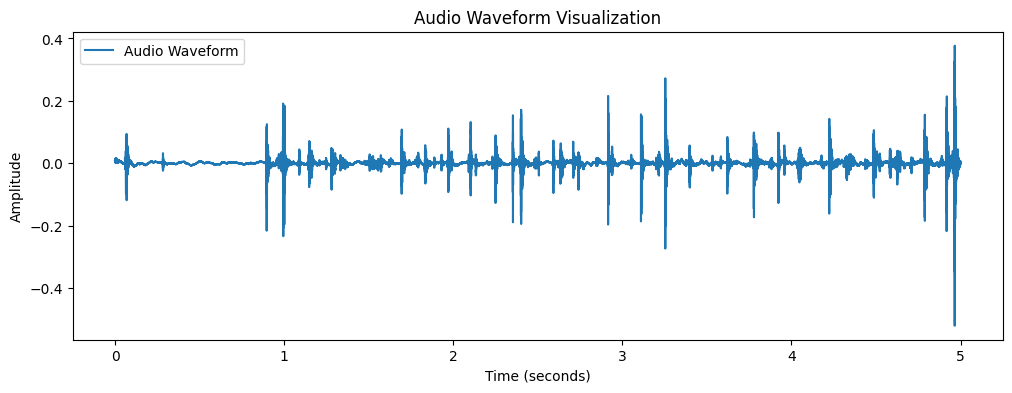

In [ ]:

# import required libraries
import mindaudio.data.io as io
import numpy as np
import matplotlib.pyplot as plt

# load the audio file
audio_file = "Audio/ESC-50-master/audio/1-137-A-32.wav"

# load audio data and sample rate
audio_data, sample_rate = io.read(audio_file)

# print audio information
print(f"Audio Data Shape: {audio_data.shape}")
print(f"Sample Rate: {sample_rate}")

# visualize audio waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data)), audio_data, label="Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform Visualization")
plt.legend()
plt.show()


# **Step 2: Adjusting the Sampling Rate**

Audio files can often have different sampling rates. Sample rate refers to how many times per second audio data is sampled. The audio dataset is put through sample rate conversion processes to convert the sample rate to a constant value.

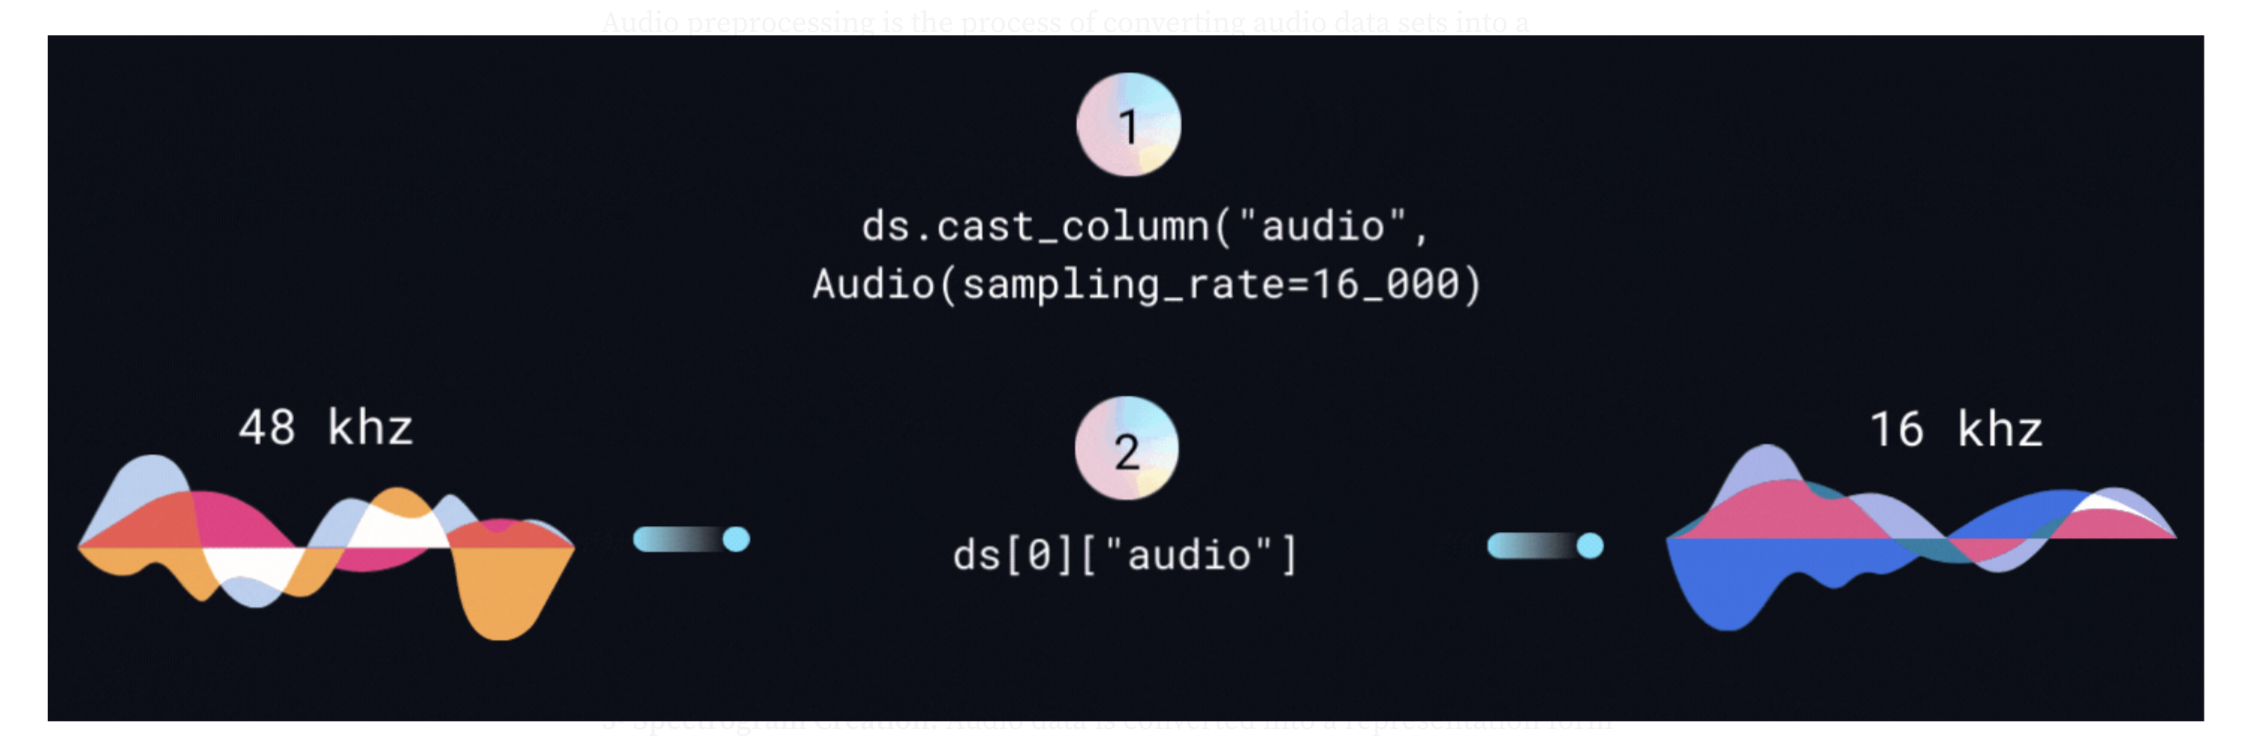

**Question 2_ESC:**  Adjust the sampling rate using MindAudio.

Original Sample Rate: 44100
Resampled Sample Rate: 16000


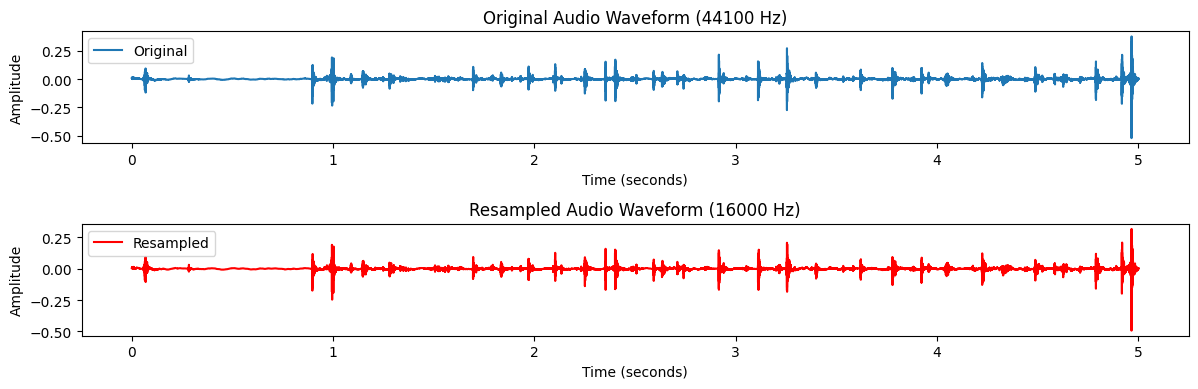

In [ ]:
import mindaudio.data.io as io
import mindspore.dataset.audio as audio
import numpy as np
import matplotlib.pyplot as plt

# load the audio file
audio_file = "Audio/ESC-50-master/audio/1-137-A-32.wav"
audio_data, sr = io.read(audio_file)

print(f"Original Sample Rate: {sr}")

# resample to 16000 Hz
target_sr = 16000
resampler = audio.Resample(orig_freq=sr, new_freq=target_sr)
resampled_audio = resampler(audio_data)

print(f"Resampled Sample Rate: {target_sr}")

# visualize the original and resampled waveform
plt.figure(figsize=(12, 4))

# original waveform
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(audio_data) / sr, num=len(audio_data)), audio_data, label="Original")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Original Audio Waveform ({sr} Hz)")
plt.legend()

# resampled waveform
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, len(resampled_audio) / target_sr, num=len(resampled_audio)), resampled_audio, label="Resampled", color='r')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Resampled Audio Waveform ({target_sr} Hz)")
plt.legend()

plt.tight_layout()
plt.show()


# **Step 3: Spectrogram Creation**

Audio data is converted into a representation form called spectrogram. A spectrogram is a heat map of frequency and time, showing how sound changes its frequency components over time. This is used to capture the spectral characteristics of the sound.

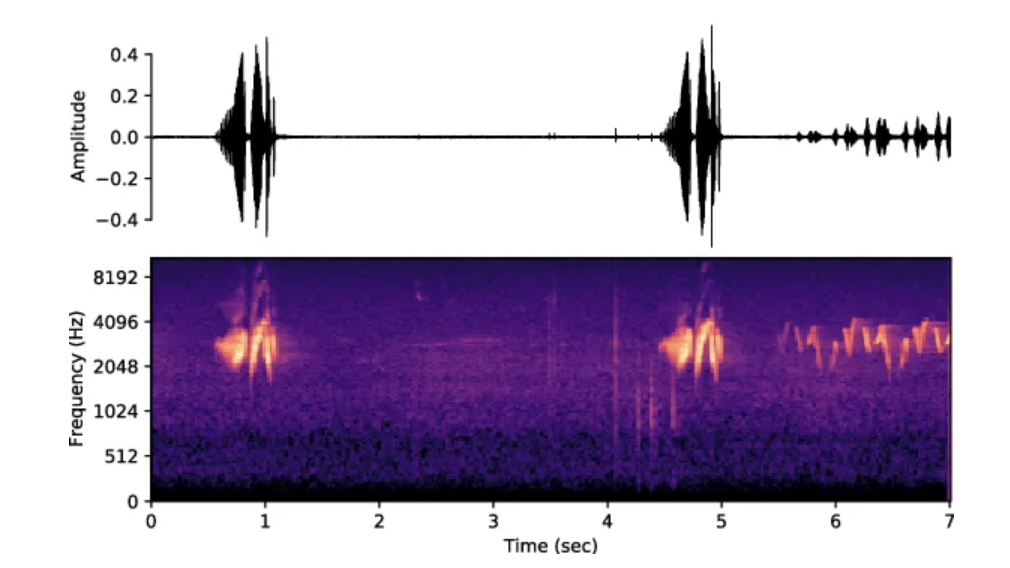

**Questio 3_ESC**: Create a spectrogram of an audio file using MindAudio.

Sample rate: 44100


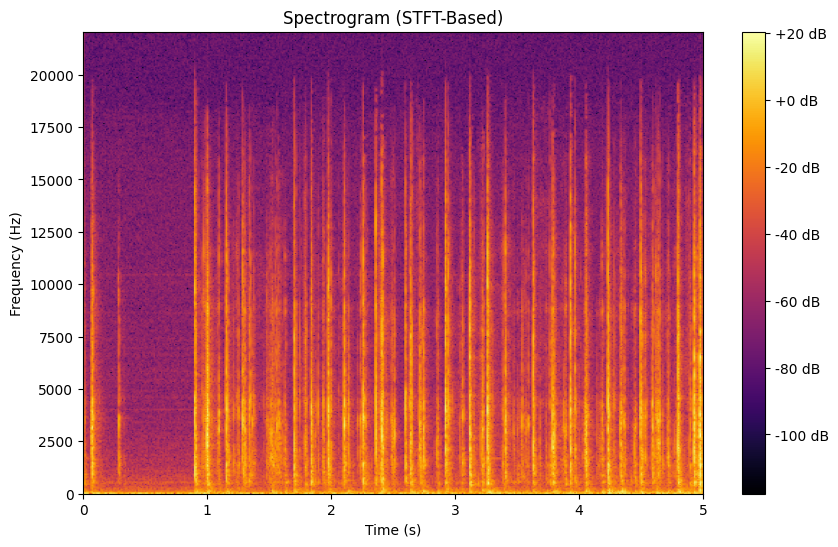

In [ ]:
import mindaudio.data.io as io
import mindaudio.data.features as features
import numpy as np
import matplotlib.pyplot as plt

# load the audio file
audio_file = "Audio/ESC-50-master/audio/1-137-A-32.wav"
audio_data, sample_rate = io.read(audio_file)

print(f"Sample rate: {sample_rate}")

# Compute the STFT
n_fft = 1024       # Defines FFT window size
hop_length = 512   # Defines step size between FFT computations
win_length = 1024  # Window function len

stft_matrix = features.stft(audio_data, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

# compute the magnitude
magnitude = np.abs(stft_matrix)

# convert Magnitude to log Scale for bettervisualization
log_magnitude = 20 * np.log10(magnitude + 1e-6)

# Plot the Spectrogram
plt.figure(figsize=(10, 6))

plt.imshow(log_magnitude, aspect='auto', origin='lower', cmap='inferno',
           extent=[0, len(audio_data) / sample_rate, 0, sample_rate / 2])

plt.title("Spectrogram (STFT-Based)")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(format='%+2.0f dB')

plt.show()


In [ ]:
# Note
#The Short-Time Fourier Transform (STFT) is computed using mindaudio.features.stft().
# This is a commonly used method to represent the frequency content of an audio signal over time

#The size of the FFT window (n_fft) and hop length (hop_length) will affect the resolution of the
#spectrogram. A larger FFT window will give better frequency resolution, while a smaller window provides
#better time resolution.

#The color map (cmap) can be adjusted to visualize the spectrogram more effectively.
#In this example, I used 'inferno', but you can try others like 'viridis', 'plasma', etc.


In [ ]:
# Note
#Magnitude Calculation: The magnitude of the STFT is taken, which represents
#the strength of the frequencies at different time instances.

# **Step 4: Feature Extraction**

The spectrogram is then converted into vectors representing the features of the sound. This process, called feature extraction, uses filtering and mathematical transformations to highlight important spectral components of the sound. Feature extraction is usually performed through methods such as Mel Frequency Cepstral Coefficients (MFCC) or Periodicity Linear Features (PLP).



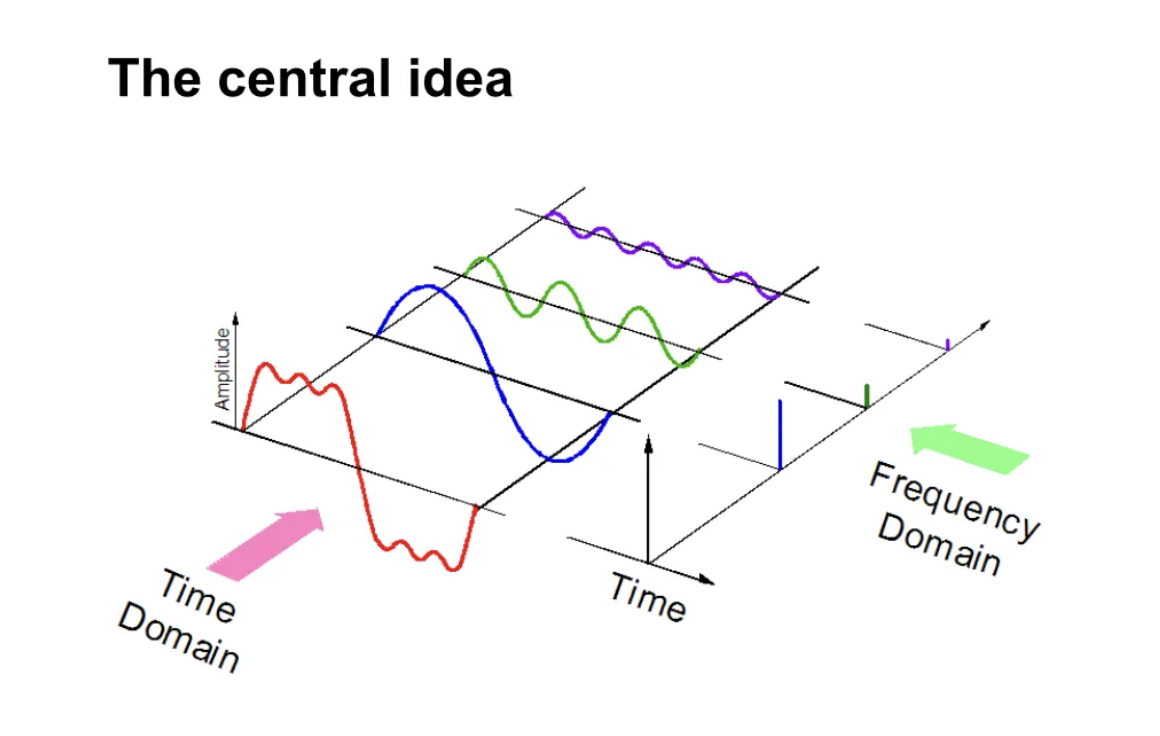

MFCC (Mel Frequency Cepstral Coefficients):
MFCC is a representation of the short-term power spectrum of a sound, and it is commonly used in speech recognition systems. It focuses on capturing the human ear's perception of sound, which is more sensitive to frequencies in the Mel scale.

Steps for Computing MFCC using MindAudio:

1 ) Load the audio file using MindAudio.

2) Compute the Mel Spectrogram (which forms the basis for MFCC).

3) Extract MFCC features from the Mel Spectrogram

PLP (Periodicity Linear Prediction):
PLP is another method for feature extraction that is more specialized for speech signals, and it emphasizes capturing periodicity information of speech sounds. It uses Linear Prediction techniques to model the speech signal and then applies transformations to the spectrum to extract features.

Unfortunately, MindAudio doesn’t natively support PLP extraction directly. However, we can use librosa or other libraries to compute PLP. Below is a general way to compute PLP features using librosa or other standard libraries.

Steps for Computing PLP Features using Librosa:

1) Load the audio file.

2) Compute the power spectrogram.

3) Apply a PLP feature extraction process (which could be done manually, as librosa doesn't have a built-in PLP function).

**Question 4_ESC:** Can you develop the MFCC and PLP and comapre the differences in terms of results and methods?


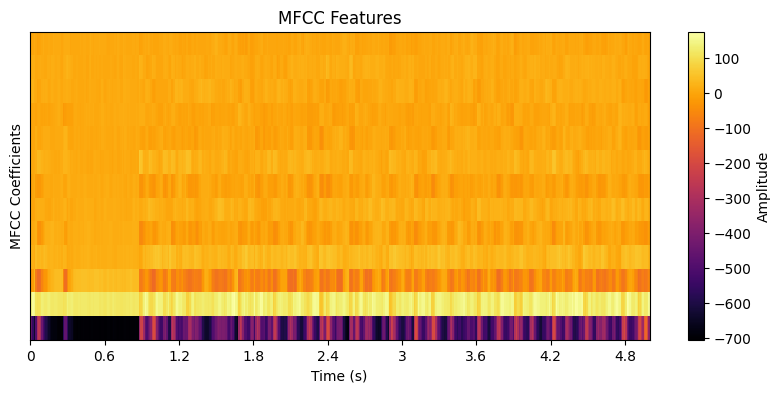

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# load the audio file
audio_file = "Audio/ESC-50-master/audio/1-137-A-32.wav"
audio_data, sample_rate = librosa.load(audio_file, sr=None)

# compute MFCC features
n_mfcc = 13  # Num of MFCC coefficients
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)

# Plot MFCC Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, sr=sample_rate, x_axis='time', cmap='inferno')
plt.colorbar(label="Amplitude")
plt.title("MFCC Features")
plt.ylabel("MFCC Coefficients")
plt.xlabel("Time (s)")
plt.show()


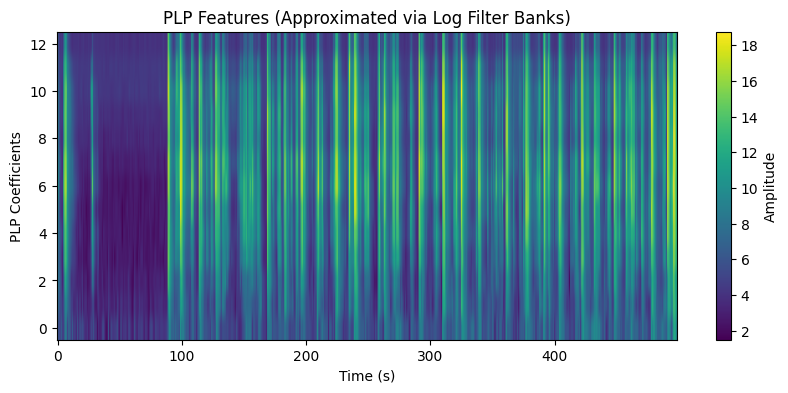

In [ ]:
from python_speech_features import mfcc, logfbank
import scipy.io.wavfile as wav

# load audio file
sample_rate, audio_data = wav.read(audio_file)

#compute approximated PLP features
plp_features = logfbank(audio_data, samplerate=sample_rate, nfilt=13)

# Plot PLP Features
plt.figure(figsize=(10, 4))
plt.imshow(plp_features.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label="Amplitude")
plt.title("PLP Features")
plt.ylabel("PLP Coefficients")
plt.xlabel("Time (s)")
plt.show()


# MFCC vs PLP Comparison
#### In the above plots.
#### MFCC shows sharp spectral variations over time, captures detailed spectral peaks

#### PLP have smoother spectral representation, captures broad trends in the speech signal
#### mfcc Uses Mel-scale filtering + DCT, best for Speech recognition, audio classification. focuses on human perception of sound. more robust to noise due to perceptual pre-emphasis.

#### PLP Uses Bark-scale filtering + LPC, best for Phoneme recognition, speech processing. it model how speech is produced, robust for speaker variations.